##### <center>British Airway Virtual Internship</center>
## <center>British Airway Data Science Virtual Internship</center>

<img src = './Downloads/Virtualnternship/QuantiumVisualizations/ba.jfif' width = '100%' height ='20%'>


# Task 1 :Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

## 1. Web Scraping

Data will be extracted using:
- Python requests library to download web pages.
- BeautifulSoup Python to parse the downloaded to an html format.

## Import required libraries

In [1]:
# Importing the request libraray that will be used to download the webpages
import requests
# Importing the BeautifulSoup lirary that would be used to parse the webpages to html format
from bs4 import BeautifulSoup

In [2]:
%%time
date = []
review = []
rcmd = []
pages = 301
import pandas as pd
for page in range(1,pages):
    url = 'https://www.airlinequality.com/airline-reviews/british-airways/page/'+str(page)+'/'
    webpage = requests.get(url).text
    soup = BeautifulSoup(webpage,'html.parser')
    date_tags = soup.find_all('time')
    review_tags=soup.find_all('div',{'class':'text_content'})
    rcmd_tags = rcmd_tags = soup.find_all('td',{'class':['review-value rating-yes','review-value rating-no']})
    for tag in date_tags:
        date.append(tag.text)
    for tag in review_tags:
        review.append(tag.text)
    for tag in rcmd_tags:
        rcmd.append(tag.text)
review_df = pd.DataFrame({'Date':date,'Review':review,'Recommended':rcmd})
    
    

Wall time: 6min 40s


In [3]:
import pandas as pd
#review_df.to_csv('BritishAirWay_reviews.csv',index = False)
reviews_df = pd.read_csv('BritishAirWay_reviews.csv')
reviews_df

,Date,Review,Recommended,Year
0,2023 Aug,Easy check in a T5. Galleries south and Nort...,yes,2023
1,2023 Aug,"Flight delayed by an hour, it happens, no bi...",no,2023
2,2023 Aug,The staff are very rude and not trained prope...,no,2023
3,2023 Aug,Good domestic flight operated by BA Cityflye...,yes,2023
4,2023 Aug,Failed at all basic travel fundamentals: 1) O...,no,2023
...,...,...,...,...
2095,2016 Mar,Istanbul to London Heathrow with British Air...,no,2016
2096,2016 Mar,London Heathrow to Houston on British Airway...,yes,2016
2097,2016 Mar,We have flown with British Airways over 100 ...,no,2016
2098,2016 Mar,British Airways from Seattle to Johannesburg...,yes,2016


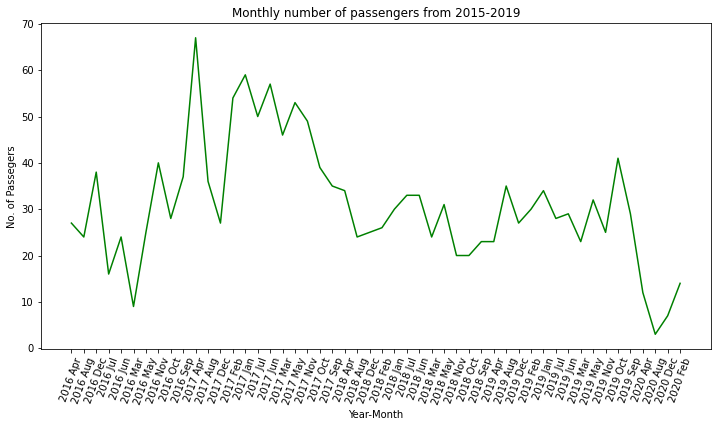

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
import datetime as dt
def yr_month(date):
    dat = pd.to_datetime(date).strftime('%Y %b')
    return dat
reviews_df['Date'] = reviews_df['Date'].apply(yr_month)
reviews_df['Year'] = pd.to_datetime(reviews_df['Date']).dt.year
monthlyBA_passgers_df = reviews_df.groupby('Date')['Review'].size().reset_index().head(50)
plt.plot(monthlyBA_passgers_df['Date'],monthlyBA_passgers_df['Review'],color = 'g')
plt.xticks(rotation = 70)
plt.title('Monthly number of passengers from 2015-2019')
plt.xlabel('Year-Month')
plt.ylabel('No. of Passegers')
plt.show()

## 2. Data Wrangling

In [5]:
#Displaying on of the reviews to identify if there are unwanted characters to be removed.
reviews_df.Review = reviews_df.Review.str.split('|',expand=True)

In [6]:
#df = reviews_df.dropna()
#df.to_csv('BritishAirWay_reviews.csv',index = False)
df = pd.read_csv('BritishAirWay_reviews.csv')
df

,Date,Review,Recommended,Year
0,2023 Aug,Easy check in a T5. Galleries south and Nort...,yes,2023
1,2023 Aug,"Flight delayed by an hour, it happens, no bi...",no,2023
2,2023 Aug,The staff are very rude and not trained prope...,no,2023
3,2023 Aug,Good domestic flight operated by BA Cityflye...,yes,2023
4,2023 Aug,Failed at all basic travel fundamentals: 1) O...,no,2023
...,...,...,...,...
2095,2016 Mar,Istanbul to London Heathrow with British Air...,no,2016
2096,2016 Mar,London Heathrow to Houston on British Airway...,yes,2016
2097,2016 Mar,We have flown with British Airways over 100 ...,no,2016
2098,2016 Mar,British Airways from Seattle to Johannesburg...,yes,2016


Looking a the data, it contains some unwanted characted that have to removed.

In [7]:
# Removing un wanted characters from the using re module
import re

def clean(text):
    text = re.sub('[^A-Za-z]+',' ',str(text))
    return text
df['cleaned_Review'] = df['Review'].apply(clean)

In [8]:
df

,Date,Review,Recommended,Year,cleaned_Review
0,2023 Aug,Easy check in a T5. Galleries south and Nort...,yes,2023,Easy check in a T Galleries south and North l...
1,2023 Aug,"Flight delayed by an hour, it happens, no bi...",no,2023,Flight delayed by an hour it happens no biggi...
2,2023 Aug,The staff are very rude and not trained prope...,no,2023,The staff are very rude and not trained prope...
3,2023 Aug,Good domestic flight operated by BA Cityflye...,yes,2023,Good domestic flight operated by BA Cityflyer...
4,2023 Aug,Failed at all basic travel fundamentals: 1) O...,no,2023,Failed at all basic travel fundamentals Our f...
...,...,...,...,...,...
2095,2016 Mar,Istanbul to London Heathrow with British Air...,no,2016,Istanbul to London Heathrow with British Airw...
2096,2016 Mar,London Heathrow to Houston on British Airway...,yes,2016,London Heathrow to Houston on British Airways...
2097,2016 Mar,We have flown with British Airways over 100 ...,no,2016,We have flown with British Airways over times...
2098,2016 Mar,British Airways from Seattle to Johannesburg...,yes,2016,British Airways from Seattle to Johannesburg ...


Now, the data is cleaned as there are no more special characters or numbers.

### Natural Language Processing Tool Kit 

In [9]:
#Import nltk
import nltk
#Importing a tokeninizer
from nltk.tokenize import word_tokenize
#import POS tagging algorithm
from nltk import pos_tag
#import stop words
from nltk.corpus import stopwords
from nltk.corpus import wordnet

Word is used to represent Part of speech in the WordNet lexical database. WordNet is a large lexical database of English words that is used in natural language processing and computational linguistics.

In [10]:
text = "John is tall"
tags = pos_tag(word_tokenize(text))
for word,tag in tags:
    print(word)

John
is
tall


In [11]:
pos_tag(word_tokenize(text))

[('John', 'NNP'), ('is', 'VBZ'), ('tall', 'JJ')]

### Tokenization and POS tagging

In [12]:
POS_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def tokenize_POS_StopWord(text):
    pos_tags = pos_tag(word_tokenize(text))
    newlist = []
    for word,tag in pos_tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word,POS_dict.get(tag[0])]))
    return newlist

df['Pos_tags'] = df['cleaned_Review'].apply(tokenize_POS_StopWord)

In [13]:
df.head()

,Date,Review,Recommended,Year,cleaned_Review,Pos_tags
0,2023 Aug,Easy check in a T5. Galleries south and Nort...,yes,2023,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south..."
1,2023 Aug,"Flight delayed by an hour, it happens, no bi...",no,2023,Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen..."
2,2023 Aug,The staff are very rude and not trained prope...,no,2023,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl..."
3,2023 Aug,Good domestic flight operated by BA Cityflye...,yes,2023,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera..."
4,2023 Aug,Failed at all basic travel fundamentals: 1) O...,no,2023,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam..."


## Lemmatization

In [14]:
# Here the stem words or lema would be obtained through the process of Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    raw_lemma = " "
    for word,pos in pos_data:
        if not pos:
            raw_lemma = raw_lemma+ " "+ word
        else:
            lemma = lemmatizer.lemmatize(word , pos = pos)
            raw_lemma = raw_lemma+ " "+ lemma
    return raw_lemma
df['Lemma'] = df['Pos_tags'].apply(lemmatize)
        

In [15]:
df.head()

,Date,Review,Recommended,Year,cleaned_Review,Pos_tags,Lemma
0,2023 Aug,Easy check in a T5. Galleries south and Nort...,yes,2023,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack...
1,2023 Aug,"Flight delayed by an hour, it happens, no bi...",no,2023,Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change ga...
2,2023 Aug,The staff are very rude and not trained prope...,no,2023,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...
3,2023 Aug,Good domestic flight operated by BA Cityflye...,yes,2023,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...
4,2023 Aug,Failed at all basic travel fundamentals: 1) O...,no,2023,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam...",Failed basic travel fundamental flight delay...


In [16]:
df_reviews = df[['cleaned_Review','Lemma']]
df_reviews.head()

,cleaned_Review,Lemma
0,Easy check in a T Galleries south and North l...,Easy check Galleries south North lounge pack...
1,Flight delayed by an hour it happens no biggi...,Flight delay hour happen biggie us change ga...
2,The staff are very rude and not trained prope...,staff rude train properly exception make chi...
3,Good domestic flight operated by BA Cityflyer...,Good domestic flight operate BA Cityflyer Gr...
4,Failed at all basic travel fundamentals Our f...,Failed basic travel fundamental flight delay...


In [17]:
document = []
for row in df_reviews.Lemma:
    for word in row.split():
        document.append(word)
print(document[:50])

['Easy', 'check', 'Galleries', 'south', 'North', 'lounge', 'pack', 'able', 'get', 'seat', 'stay', 'long', 'B', 'gate', 'lounge', 'much', 'quiet', 'Flight', 'board', 'smoothly', 'time', 'upper', 'deck', 'Old', 'club', 'world', 'seat', 'begin', 'age', 'little', 'However', 'like', 'large', 'toilet', 'aircraft', 'type', 'Cabin', 'crew', 'fantastic', 'One', 'family', 'tech', 'issue', 'seat', 'entertainment', 'system', 'crew', 'work', 'hard', 'though']


In [18]:
word_counts = nltk.FreqDist(document)

In [19]:
words = []
counts = []
for key in word_counts:
    words.append(key)
    counts.append(word_counts[key])
counts_df = pd.DataFrame({'Word':words,'Counts':counts})[:50]

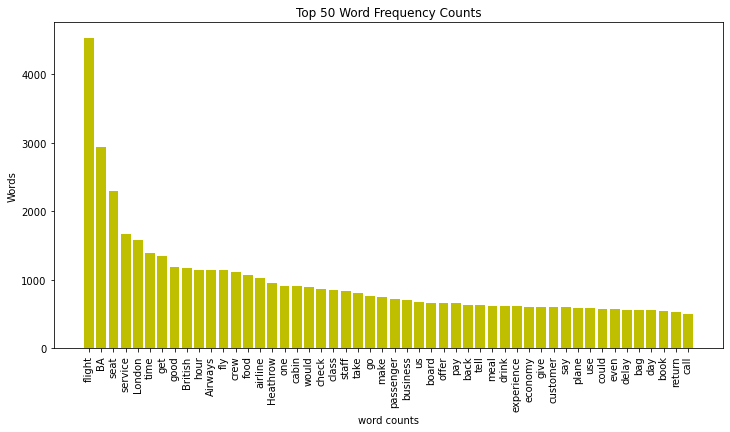

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
#sns.barplot(x = 'Word',y = 'Counts', data = counts_df)
plt.bar(counts_df.Word,counts_df.Counts, color = 'y')
plt.xticks(rotation = 90)
plt.xlabel('word counts')
plt.ylabel('Words')
plt.title('Top 50 Word Frequency Counts')
plt.show()

In [21]:
# Creating a text variable
text = ''.join([lemma for lemma in df.Lemma])
text[:1000]

'  Easy check Galleries south North lounge pack able get seat stay long B gate lounge much quiet Flight board smoothly time upper deck Old club world seat begin age little However like large toilet aircraft type Cabin crew fantastic One family tech issue seat entertainment system crew work hard though sadly without success Food drink option good Entertainment good Overall enjoyable flight  Flight delay hour happen biggie us change gate airport never happen guess ok Gate agent ask us check bag tell would prefer anyway Second gate agent reassign seat exit row regular huge squeeze travel bud  staff rude train properly exception make child elderly people price ticket expensive give distance service extremely extremely poor  Good domestic flight operate BA Cityflyer Ground service check Edinburgh airport particularly friendly helpful flight depart time arrive early schedule complimentary drink snack albeit tiny serve Generally seem quality Cityflyer subsidiary superior mainline British Airw

In [22]:
#!pip install --upgrade pip
#!pip install --upgrade Pillow

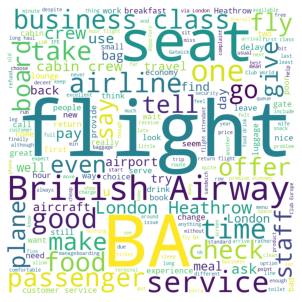

In [23]:
# Creating word_cloud with text as argument in .generate() method
#To generate a word cloud for the column df.reviews using Python 3, you can use the WordCloud library. Here is an example code snippet that shows how to do this:

#Python
#This code is AI-generated. Review and use carefully. Visit our FAQ for more information.

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(' '.join(df.Lemma))

# Plot the WordCloud image
plt.figure(figsize=(8, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

## VADER's Sentiment Analysis

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [25]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(df.Lemma[0])

{'neg': 0.09, 'neu': 0.623, 'pos': 0.287, 'compound': 0.9415}

In [26]:
#for i, j in enumerate([1,2,5,6]),returns each in a list and its index
#for index,row in df_reviews.iterrows() use to interate through a dataframe it return each row in a dataframe and its index
#d1 = {'m':1,'n':3} ,d2 = {'m':7,'n':6}
#pd.DataFrame({1:d1,2:d2}) returns a data frame with indices m and n and columns columns 1 and 2

scores = {}
for i, row in df_reviews.iterrows():
    text = row['Lemma']
    ID = i
    scores[i] = sia.polarity_scores(text)
sentiment_df = pd.DataFrame(scores).T

In [27]:
# the sentiment dataframe has 2100 records corressponding to the 2100 reviews
sentiment_df.head()

,neg,neu,pos,compound
0,0.090,0.623,0.287,0.9415
1,0.109,0.831,0.060,-0.2235
2,0.294,0.706,0.000,-0.7698
3,0.000,0.661,0.339,0.9420
4,0.396,0.604,0.000,-0.9019


In [28]:
df_reviews['id'] = [idx for idx in range(len(df_reviews))]
sentiment_df['id'] = [idx for idx in range(len(sentiment_df))]
merged_Revscores_df =  df_reviews.merge(sentiment_df, on = 'id',how = 'right').drop('id',axis = 1)
merged_Revscores_df.head()

<ipython-input-28-cd0e015f64b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['id'] = [idx for idx in range(len(df_reviews))]


,cleaned_Review,Lemma,neg,neu,pos,compound
0,Easy check in a T Galleries south and North l...,Easy check Galleries south North lounge pack...,0.090,0.623,0.287,0.9415
1,Flight delayed by an hour it happens no biggi...,Flight delay hour happen biggie us change ga...,0.109,0.831,0.060,-0.2235
2,The staff are very rude and not trained prope...,staff rude train properly exception make chi...,0.294,0.706,0.000,-0.7698
3,Good domestic flight operated by BA Cityflyer...,Good domestic flight operate BA Cityflyer Gr...,0.000,0.661,0.339,0.9420
4,Failed at all basic travel fundamentals Our f...,Failed basic travel fundamental flight delay...,0.396,0.604,0.000,-0.9019


The _compound_ column gives the combined sentiment of each  of the reviews. The question which range of values for the combined sentiment is to be consider positive,neutral or negative?

Below is the standard scoring metric followed by most of the sentiment analyzers.

- Positive sentiment: compound score >= 0.05
- Neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- Negative sentiment: compound score <= -0.05

In [29]:
def sentimentAnalysis(compound):
    if compound > 0.05:
        return 'positive'
    elif compound < -0.05:
        return 'negative'
    else:
        return 'neutral'
merged_Revscores_df['Sentiment'] = merged_Revscores_df['compound'].apply(sentimentAnalysis)

Sent_df = merged_Revscores_df[['cleaned_Review','compound','Sentiment']]
Sent_df.head()

,cleaned_Review,compound,Sentiment
0,Easy check in a T Galleries south and North l...,0.9415,positive
1,Flight delayed by an hour it happens no biggi...,-0.2235,negative
2,The staff are very rude and not trained prope...,-0.7698,negative
3,Good domestic flight operated by BA Cityflyer...,0.9420,positive
4,Failed at all basic travel fundamentals Our f...,-0.9019,negative


In [30]:
# Getting the total number of positive,negative and neutral sentiments
positive = sentiment_df[sentiment_df['compound'] >= 0.05]
neutral = sentiment_df[(sentiment_df['compound'] > -0.05)&(sentiment_df['compound'] < 0.05)]
negative = sentiment_df[sentiment_df['compound'] <= -0.05]
print('pos:{} neu:{} neg:{}'.format(len(positive),len(neutral),len(negative)))

pos:1307 neu:27 neg:766


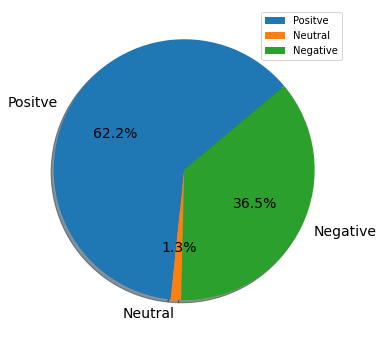

In [31]:
#Displaying the information on a pie chart
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (12,6))
values = [len(positive),len(neutral),len(negative)]
labels = ['Positve','Neutral','Negative']
#colors = [ "orange","cyan", "brown","grey"] 
plt.pie(values,labels = labels, autopct = '%.1f%%',shadow = True,
       textprops={'fontsize': 14,},startangle = 40)
plt.legend()
plt.show()

### Task 2 : Building a Predictive Model to Understand Factors Influencing Customers Buying Behaviour 

### Importing important libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing and Exploring Dataset

In [33]:
# Read data using pandas
df = pd.read_csv('D:\sqldatasets\Foragedatasets\customer_booking.csv')

In [34]:
# display first 5 rows
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [35]:
#dataset size
df.shape

(50000, 14)

In [36]:
# column names
print(list(df.columns))

['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']


In [37]:
# Display datatypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [38]:
# Check columns containing NaN values
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

Data contains no NaN values.

<AxesSubplot:>

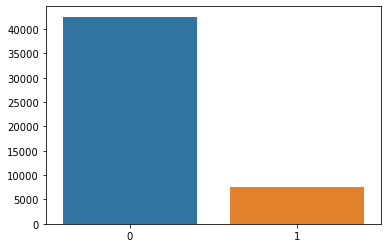

In [39]:
# Checking if dataset is balanced or not.

sns.barplot(x = df['booking_complete'].value_counts().index, y = df['booking_complete'].value_counts().values)

The dataset is not balanced thus LogisticRegression will not be suitable for this task.Instead, RandomForest any other tree algorithm could be used.

In [40]:
# Summary of descriptive analysis
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


It could be observed from the descriptive analysis some features such num_passengers, purchase_lead, lead_of_stay are right skweed since their mean values are greated than their median values while feature, flight_hour is follows normal distribution.

### Numerical and Categorical Features

In [41]:
#Numerical columns
num_features = df.select_dtypes( exclude = 'object').columns.to_list()
print(num_features)

['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']


In [42]:
# Categorical columns
cat_features =   df.select_dtypes( include = 'object').columns.to_list()

### Correlation matrix

<AxesSubplot:>

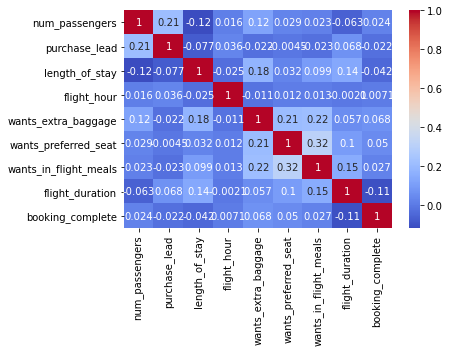

In [43]:
sns.heatmap(df.corr(),cmap = 'coolwarm',annot = True)

### Building a RandomForest Classifier

In [44]:
# Splitting the dataset into train and test sets.
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.25,random_state = 42)


In [45]:
# displaying train and test size
print('train_size :{}  test_size:{}'.format(len(train_df), len(test_df)))

train_size :37500  test_size:12500


In [46]:
import warnings
warnings.filterwarnings('ignore')

### Data preprocessing

In [47]:
#Numerical feature scaling
from sklearn.preprocessing import MinMaxScaler

train_num_cols = list([feature for feature in num_features if feature not in ['booking_complete']])
train_target = train_df['booking_complete']
scaler = MinMaxScaler()
scaler.fit(train_df[train_num_cols])
train_df[train_num_cols] = scaler.transform(train_df[train_num_cols])

In [48]:
train_df[train_num_cols].head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
27434,0.125,0.051136,0.004918,0.217391,0.0,0.0,0.0,0.482402
13400,0.000,0.044034,0.031148,0.521739,1.0,0.0,1.0,0.809524
883,0.250,0.585227,0.034426,0.478261,1.0,0.0,1.0,0.861284
7303,0.000,0.090909,0.027869,0.434783,1.0,0.0,0.0,0.861284
45124,0.000,0.046875,0.009836,0.347826,1.0,0.0,1.0,0.600414


In [49]:
test_df[train_num_cols] = scaler.transform(test_df[train_num_cols])
test_df[train_num_cols].head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
33553,0.125,0.066761,0.006557,0.652174,1.0,1.0,0.0,0.482402
9427,0.000,0.065341,0.139344,0.608696,1.0,1.0,0.0,0.861284
199,0.000,0.187500,0.032787,0.391304,1.0,0.0,0.0,0.861284
12447,0.000,0.082386,0.029508,1.000000,1.0,1.0,1.0,0.600414
39489,0.125,0.071023,0.008197,0.217391,1.0,0.0,0.0,0.403727


In [50]:
# One-hot Encoding of Categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder.fit(train_df[cat_features])
#encoder.transform(train_df[cat_features])
encoded_cols = encoder.get_feature_names(cat_features)
train_df[encoded_cols] = encoder.transform(train_df[cat_features])

In [51]:
train_df[encoded_cols]

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
27434,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13400,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
883,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7303,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45124,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44732,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#encoder.transform(train_df[cat_features])
encoded_cols = list(encoder.get_feature_names(cat_features))
test_df[encoded_cols] = encoder.transform(test_df[cat_features])

In [53]:
test_df[encoded_cols]

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
33553,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9427,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12447,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39489,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9771,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34737,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30390,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6797,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
#Pocessed train and test sets
train_df[encoded_cols]

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
27434,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13400,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
883,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7303,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45124,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44732,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
train_df[encoded_cols]

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
27434,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13400,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
883,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7303,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45124,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44732,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
x_train = train_df[train_num_cols + encoded_cols]
y_train = train_df['booking_complete']
x_test = test_df[train_num_cols + encoded_cols]
y_test = test_df['booking_complete']

### Model Training

In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)
print('Train_score: {}%'.format(round(model.score(x_train,y_train)*100),2))

Train_score: 100%


### Model validation on test_set

In [58]:
print('Train_score: {}%'.format(round(model.score(x_test,y_test)*100),2))

Train_score: 85%


### Features Selection

Text(0.5, 1.0, 'Top 10 important features influencing customers buying behaviour')

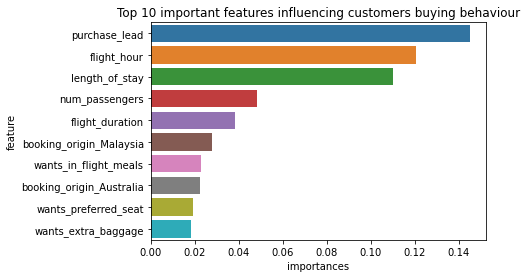

In [59]:
importances = model.feature_importances_
importance_df = pd.DataFrame({'feature':x_train.columns, 'importances':importances}).sort_values('importances',ascending = False)[:10]
sns.barplot(x = 'importances',y = 'feature',data = importance_df)
plt.title('Top 10 important features influencing customers buying behaviour')

## Conclusion
From above, the model on the training set is 100% and that on the validation is 85% with a difference of 15%. This means that model overfitting occured during training. To solve this problem of model overfitting, hyperparameter tuning and feature selection using PCA will be performed.